In [47]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
from PIL import Image
import matplotlib.pyplot as plt
import os
import numpy as np
import sys

In [49]:
#sys.path.append('~/coding_projects/image_cropper/')
sys.path.append('/home/ivan/coding_projects/image_cropper/')
from cropping_functions import *

In [50]:
#folder_to_scan = '/Users/ivanlengyel/Desktop/stylegan/'
folder_to_scan = '/home/ivan/coding_projects/stylegan/results/00001-sgan-ffhq-mars-1gpu/'

In [51]:
files = os.listdir(folder_to_scan)

In [52]:
valid_file_types = ['.png']
valid_files = []
for file in files:
    f, fe = os.path.splitext(file)
    if fe in valid_file_types:
        valid_files.append(file)

full_path_valid_files = [folder_to_scan+file for file in valid_files]
fakes = [ff for ff in full_path_valid_files if 'fake' in ff]

In [53]:
x_total = 3840/128
y_total = 2048/128
print(x_total, y_total)

30.0 16.0


In [54]:
fakes.sort()

In [55]:
im = Image.open(fakes[-1])

In [28]:
#shift
xs = 6
ys = 4
#windows
xd = 8
yd = 6

In [63]:
#shift
xs = 7
ys = 1
#windows
xd = 7
yd = 5

im_s = 128
imc = im.crop((xs*im_s, ys*im_s ,(xs+xd)*im_s, (ys+yd)*im_s))
imc_np = np.asarray(imc)

In [64]:
import imageio

<IPython.core.display.Javascript object>


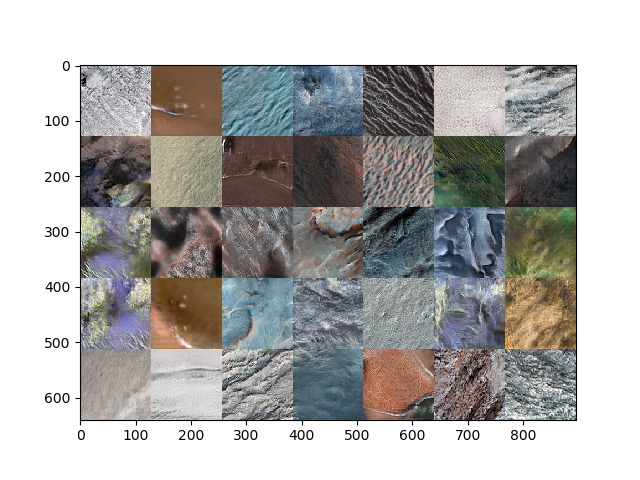

In [65]:
plt.figure()
plt.imshow(imc_np)

### Pipe read image

In [72]:
resize = 1.5

images = []
for ff in fakes[::3]:
    im = Image.open(ff) 
    imc = im.crop((xs*im_s, ys*im_s ,(xs+xd)*im_s, (ys+yd)*im_s))
    new_size = tuple([int(round(s/resize)) for s in list(imc.size)])
    imc = imc.resize(new_size)
    imc_np = np.asarray(imc)
    images.append(imc_np)

In [73]:
imageio.mimsave('./test.gif',images, format='GIF',fps=6)

## Generate custom samples of the image

In [32]:
im = Image.open(fakes[-1]) 

In [35]:
im.size

(3840, 2048)

In [37]:
im.size[0]/128, im.size[1]/128

(30.0, 16.0)

In [40]:
import itertools

In [46]:
xs = 0
ys = 0
#windows
xd = 9
yd = 8

i = 0
for xs, ys in itertools.product(np.array([0,1,2])*xd, np.array([0,1])*yd ):
    im_s = 128
    imc = im.crop((xs*im_s, ys*im_s ,(xs+xd)*im_s, (ys+yd)*im_s))
    imc.save('./fake_{}_crop.jpg'.format(i), format='JPEG')
    i+=1

In [ ]:
xs = 7
ys = 1
#windows
xd = 8
yd = 6

im_s = 128
imc = im.crop((xs*im_s, ys*im_s ,(xs+xd)*im_s, (ys+yd)*im_s))
imc.save('./fake_1_crop.jpg', format='JPEG')

In [ ]:
xs = 7
ys = 7
#windows
xd = 8
yd = 6

im_s = 128
imc = im.crop((xs*im_s, ys*im_s ,(xs+xd)*im_s, (ys+yd)*im_s))
imc.save('./fake_2_crop.jpg', format='JPEG')

In [ ]:
xs = 7+8
ys = 1
#windows
xd = 8
yd = 6

im_s = 128
imc = im.crop((xs*im_s, ys*im_s ,(xs+xd)*im_s, (ys+yd)*im_s))
imc.save('./fake_3_crop.jpg', format='JPEG')

#### real

In [ ]:
im = Image.open('/Users/ivanlengyel/Desktop/stylegan/reals.png') 

In [ ]:
xs = 7
ys = 1
#windows
xd = 8
yd = 6

im_s = 128
imc = im.crop((xs*im_s, ys*im_s ,(xs+xd)*im_s, (ys+yd)*im_s))
imc.save('./real_1_crop.jpg', format='JPEG')